In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangladesh-weather-dataset/Temp_and_rain.csv


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
rcParams['figure.figsize'] = 10,8


In [131]:
df = pd.read_csv('/kaggle/input/bangladesh-weather-dataset/Temp_and_rain.csv')
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [132]:
def generate_report(data):
    print(data.info())
    print(data.describe())

In [133]:
generate_report(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.2 KB
None
               tem        Month        Year         rain
count  1380.000000  1380.000000  1380.00000  1380.000000
mean     25.066213     6.500000  1958.00000   203.275431
std       3.682411     3.453304    33.20842   202.730898
min      16.800600     1.000000  1901.00000     0.000000
25%      22.114125     3.750000  1929.00000    18.498850
50%      27.012950     6.500000  1958.00000   145.086000
75%      28.007850     9.250000  1987.00000   347.639500
max      29.526000    12.000000  2015.00000  1012.020000


In [134]:
df.isnull().sum().sort_values(ascending=False)

tem      0
Month    0
Year     0
rain     0
dtype: int64

In [135]:
yearwise_avgtemp = df.groupby('Year', as_index= False).tem.mean()
yearwise_avgtemp

,Year,tem
0,1901,24.819617
1,1902,24.672608
2,1903,24.823542
3,1904,24.628058
4,1905,24.205500
...,...,...
110,2011,25.464492
111,2012,24.978775
112,2013,24.893617
113,2014,24.868558


<AxesSubplot:xlabel='Year'>

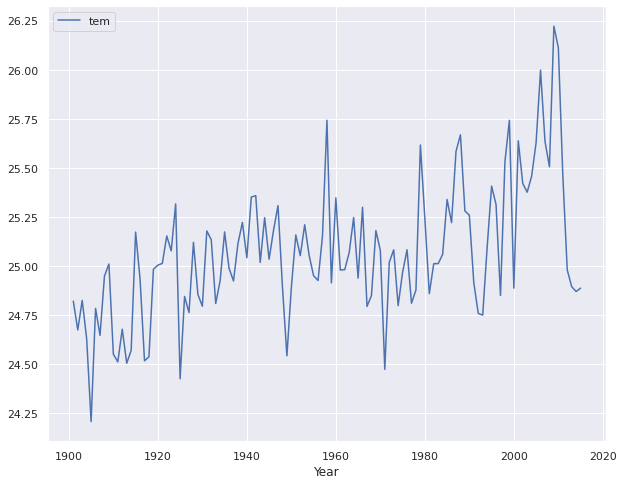

In [136]:
yearwise_avgtemp.plot(x='Year', y='tem')

In [137]:
yearwise_avgrain = df.groupby('Year', as_index= False).rain.mean()
yearwise_avgrain

,Year,rain
0,1901,202.734954
1,1902,195.476197
2,1903,188.115608
3,1904,204.172440
4,1905,233.859435
...,...,...
110,2011,233.174734
111,2012,177.428295
112,2013,180.089055
113,2014,160.281175


<AxesSubplot:xlabel='Year'>

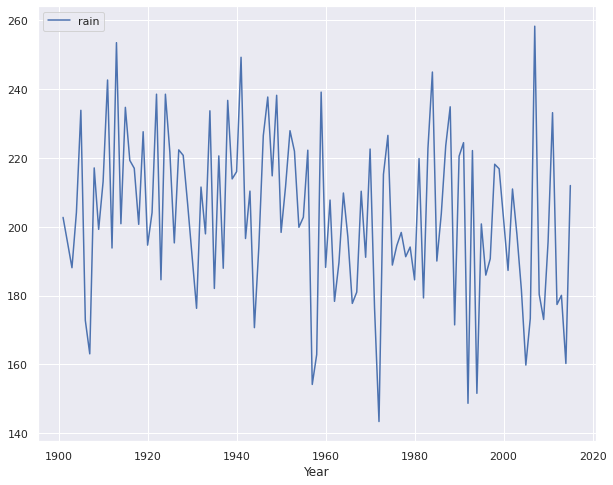

In [138]:
yearwise_avgrain.plot(x='Year', y='rain')

In [139]:
avg_df = yearwise_avgtemp.join(yearwise_avgrain.set_index('Year'), on='Year')
avg_df.head()

,Year,tem,rain
0,1901,24.819617,202.734954
1,1902,24.672608,195.476197
2,1903,24.823542,188.115608
3,1904,24.628058,204.172440
4,1905,24.205500,233.859435


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


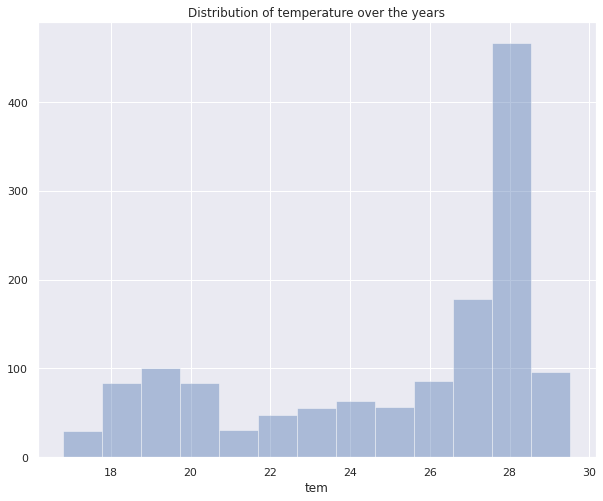

In [140]:
ax = sns.distplot(df['tem'], kde=False).set_title("Distribution of temperature over the years")

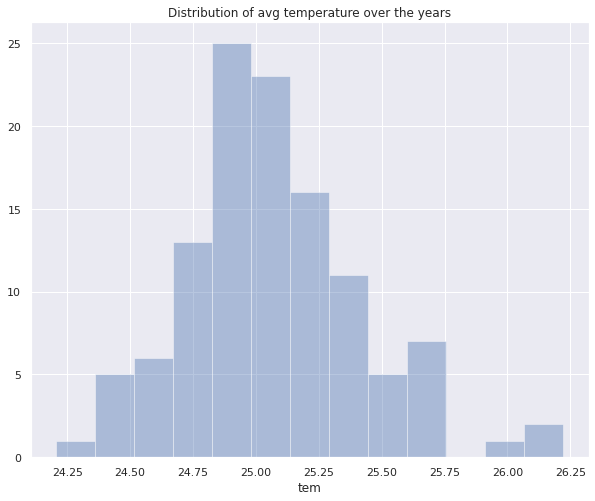

In [141]:
ax = sns.distplot(avg_df['tem'], kde=False).set_title("Distribution of avg temperature over the years")

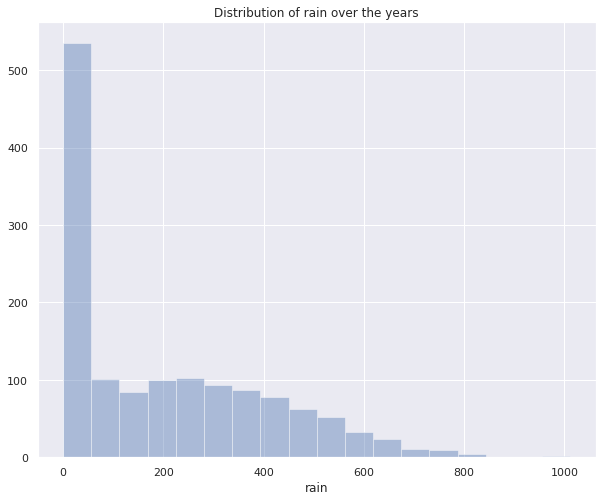

In [142]:
ax = sns.distplot(df['rain'], kde=False).set_title("Distribution of rain over the years")

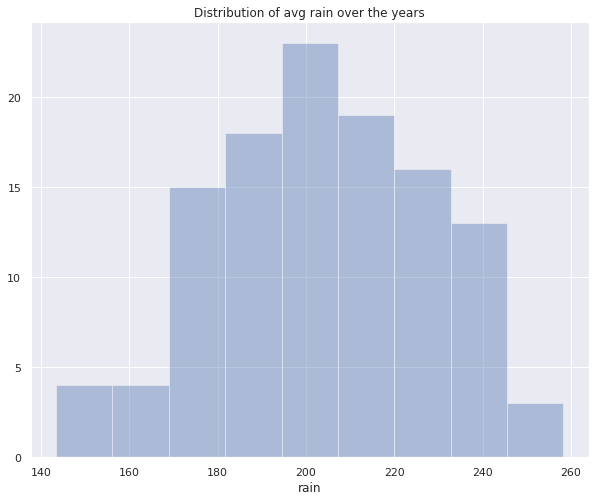

In [143]:
ax = sns.distplot(avg_df['rain'], kde=False).set_title("Distribution of avg rain over the years")

# Correlation between between temperature and rain

<AxesSubplot:xlabel='tem', ylabel='rain'>

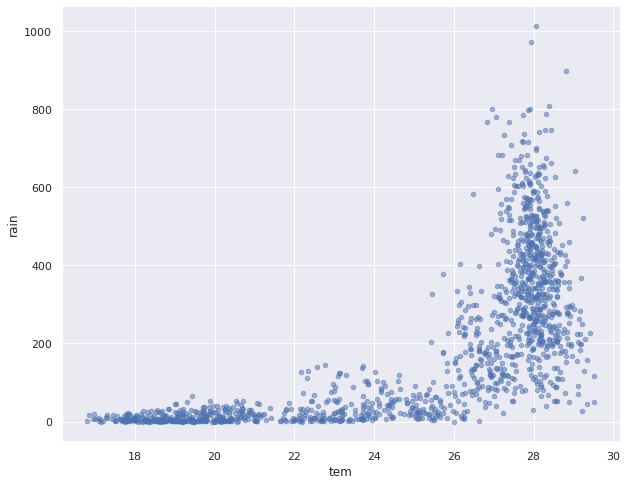

In [144]:
df.plot(x='tem', y='rain', kind="scatter", alpha=0.5)

<AxesSubplot:>

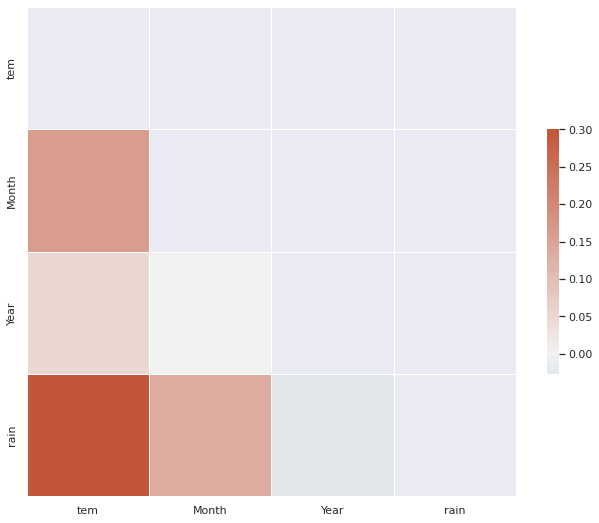

In [145]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Feature Engineering

In [146]:
df['rain_log'] = df['rain'].apply(np.log)

<AxesSubplot:xlabel='tem', ylabel='rain_log'>

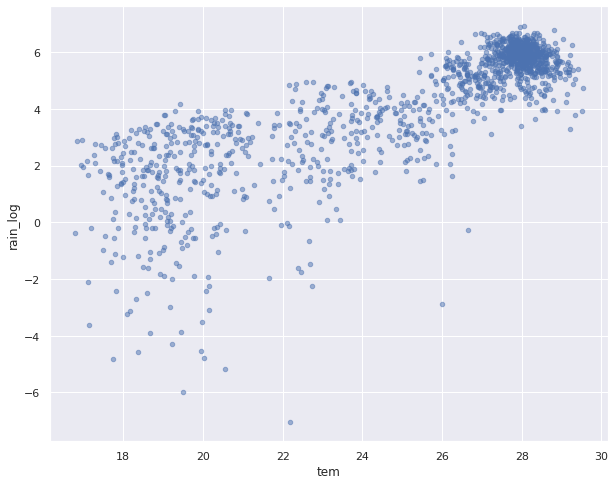

In [147]:
df.plot(x='tem', y='rain_log', kind="scatter", alpha=0.5)

# Using linear regression to model the relationship

In [148]:
X = df[['tem']]
y = df[['rain_log']]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1242, 1)
(1242, 1)


In [150]:
X.isnull().sum()

tem    0
dtype: int64

In [151]:
def train_linReg(features, labels):
    lin_reg = LinearRegression()
    lin_reg.fit(features, labels)
    return lin_reg
    
lin_reg = train_linReg(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').